<a href="https://colab.research.google.com/github/Carolkinyua-hub/Kasi_dataset/blob/main/Kasi_Caroline_Kinyua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The raw data is a survey based data collected in several countries in Africa.
The survey is in French and English.**

You are required to:
---
1. Describe the dataset.
2. Perform data cleaning (remove duplicates, erroneous entries, etc.).
3. Clean, combine the questions into 1 english only dataset.
4. Summarize the results using pivot table.
* By country
* By gender

5. Perform statistical analysis and provide results (confidence level, etc.)
,Provide the output in one spreadsheet.

6. Provide recommendation on how to automate the data cleaning process using tools you have learned (macro, python, etc.)



In [156]:
%pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 5.1 MB/s eta 0:00:00


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import re
import math
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Carolkinyua-hub/Kasi_dataset/main/Kasi_Interview%20-%20Raw%20data.csv')

In [ ]:
df.head()

,Timestamp,2. Has it become more difficult or easier to find a job in your city? *,"3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *","4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *",5. Will you be able to meet your regular expenses over the next 6 months? *,6. How do you expect your (household’s) income to change over the next 6 months? *,7. How do you expect general economic conditions in your city to change over the next 6 months? *,8. How do you expect general economic conditions in your country to change over the next 6 months?,9. Gender *,10. What is your marital status *,...,"22. The below images show a bank website and offering, choose the interface that is easiest to use",23. Tell us the reasons behind your choice,24. What will make you stay with your bank for the next 2 years ?,17. Comment évaluez-vous votre satisfaction globale vis-à-vis de votre banque?,"18. En repensant à l'année écoulée, parlez-nous de quelque chose qui vous a rendu particulièrement SATISFAIT avec votre banque.","19. En repensant à l'année écoulée, parlez-nous de quelque chose qui vous a rendu particulièrement DECU avec votre banque.","20. Au cours de la dernière année, avez-vous recommandé votre banque à qui que ce soit?",21. Comment trouvez-vous habituellement de nouveaux produits à la banque?,22. Dans quelle mesure recommanderiez-vous votre banque à vos amis / votre famille?,23. Qu'est-ce qui vous fera rester avec votre banque pour les 2 prochaines années?
0,10/20/2019 9:46:10,Same / Pareil,No / Non,Less / Moins,Maybe / Peut-être,Improve / Améliorée,Improve / Améliorée,Improve / Améliorée,Female / Femme,Single / Célibataire,...,NaN,NaN,NaN,4.0,RAS,les débits en compte pour des services auxquel...,"Non, mais je n'ai pas eu l'occasion",SMS,6.0,La commodité (c'est-à-dire que j'obtiens des s...
1,10/20/2019 9:56:32,Same / Pareil,Maybe / Peut-être,Same / Pareil,Maybe / Peut-être,Stay the same / La même,Stay the same / La même,Stay the same / La même,Male / Homme,Dating / En couple,...,Image 2,It's more user interactive,My bank is genuinely interested in my financia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/20/2019 23:56:42,Same / Pareil,Maybe / Peut-être,Same / Pareil,Maybe / Peut-être,Stay the same / La même,Stay the same / La même,Stay the same / La même,Male / Homme,Married / Marié,...,Image 2,It's short,My bank is genuinely interested in my financia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/21/2019 3:21:10,Difficult / Plus difficile,No / Non,Less / Moins,No / Non,Worsen / Détériorée,Worsen / Détérioriée,Worsen / Détériorée,Female / Femme,Married / Marié,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/21/2019 3:19:33,Difficult / Plus difficile,No / Non,Less / Moins,No / Non,Worsen / Détériorée,Worsen / Détérioriée,Worsen / Détériorée,Male / Homme,Married / Marié,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols=df.columns.to_list()

In [ ]:
cols

['Timestamp',
 '2. Has it become more difficult or easier to find a job in your city? *',
 '3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *',
 '4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *',
 '5. Will you be able to meet your regular expenses over the next 6 months? *',
 '6. How do you expect your (household’s) income to change over the next 6 months? *',
 '7. How do you expect general economic conditions in your city to change over the next 6 months? *',
 '8. How do you expect general economic conditions in your country to change over the next 6 months?',
 '9. Gender *',
 '10. What is your marital status *',
 '11. Age *',
 "12. What's your highest level of education? *",
 '13. Occupation *',
 '14. Email Address *',
 '15. Please select your country to continue',
 '16. Which one bank d

In [ ]:
df.shape

(3263, 38)

There are 38 columns and 3,263 rows of data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 38 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                             3263 non-null   object 
 1   2. Has it become more difficult or easier to find a job in your city? *                                                                                               3263 non-null   object 
 2   3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given

In [ ]:
missing=df.isna().sum() / len(df) * 100
print(missing)

Timestamp                                                                                                                                                                0.000000
2. Has it become more difficult or easier to find a job in your city? *                                                                                                  0.000000
3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *                                     0.000000
4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *     0.000000
5. Will you be able to meet your regular expenses over the next 6 months? *                                                                                              0.000000
6. How do you expect your (household’s) income to change over the next 6 months? *                            

In [ ]:
df.nunique()

,0
Timestamp,3255
2. Has it become more difficult or easier to find a job in your city? *,3
"3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *",3
"4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *",3
5. Will you be able to meet your regular expenses over the next 6 months? *,3
6. How do you expect your (household’s) income to change over the next 6 months? *,3
7. How do you expect general economic conditions in your city to change over the next 6 months? *,3
8. How do you expect general economic conditions in your country to change over the next 6 months?,3
9. Gender *,2
10. What is your marital status *,7


In [ ]:
df.head()

,Timestamp,2. Has it become more difficult or easier to find a job in your city? *,"3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *","4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *",5. Will you be able to meet your regular expenses over the next 6 months? *,6. How do you expect your (household’s) income to change over the next 6 months? *,7. How do you expect general economic conditions in your city to change over the next 6 months? *,8. How do you expect general economic conditions in your country to change over the next 6 months?,9. Gender *,10. What is your marital status *,...,"22. The below images show a bank website and offering, choose the interface that is easiest to use",23. Tell us the reasons behind your choice,24. What will make you stay with your bank for the next 2 years ?,17. Comment évaluez-vous votre satisfaction globale vis-à-vis de votre banque?,"18. En repensant à l'année écoulée, parlez-nous de quelque chose qui vous a rendu particulièrement SATISFAIT avec votre banque.","19. En repensant à l'année écoulée, parlez-nous de quelque chose qui vous a rendu particulièrement DECU avec votre banque.","20. Au cours de la dernière année, avez-vous recommandé votre banque à qui que ce soit?",21. Comment trouvez-vous habituellement de nouveaux produits à la banque?,22. Dans quelle mesure recommanderiez-vous votre banque à vos amis / votre famille?,23. Qu'est-ce qui vous fera rester avec votre banque pour les 2 prochaines années?
0,10/20/2019 9:46:10,Same / Pareil,No / Non,Less / Moins,Maybe / Peut-être,Improve / Améliorée,Improve / Améliorée,Improve / Améliorée,Female / Femme,Single / Célibataire,...,NaN,NaN,NaN,4.0,RAS,les débits en compte pour des services auxquel...,"Non, mais je n'ai pas eu l'occasion",SMS,6.0,La commodité (c'est-à-dire que j'obtiens des s...
1,10/20/2019 9:56:32,Same / Pareil,Maybe / Peut-être,Same / Pareil,Maybe / Peut-être,Stay the same / La même,Stay the same / La même,Stay the same / La même,Male / Homme,Dating / En couple,...,Image 2,It's more user interactive,My bank is genuinely interested in my financia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/20/2019 23:56:42,Same / Pareil,Maybe / Peut-être,Same / Pareil,Maybe / Peut-être,Stay the same / La même,Stay the same / La même,Stay the same / La même,Male / Homme,Married / Marié,...,Image 2,It's short,My bank is genuinely interested in my financia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/21/2019 3:21:10,Difficult / Plus difficile,No / Non,Less / Moins,No / Non,Worsen / Détériorée,Worsen / Détérioriée,Worsen / Détériorée,Female / Femme,Married / Marié,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/21/2019 3:19:33,Difficult / Plus difficile,No / Non,Less / Moins,No / Non,Worsen / Détériorée,Worsen / Détérioriée,Worsen / Détériorée,Male / Homme,Married / Marié,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check for duplicates

In [ ]:
dups=df.duplicated().sum()

In [ ]:
print(f"Number of duplicate rows: {dups}")

Number of duplicate rows: 1


In [ ]:
df=df.drop_duplicates(keep='first')

# English Dataset

In [ ]:
df = df[[x for x in df.columns if not re.search(r"[àéèêçöü]", x)]]

In [ ]:
df.columns

Index(['Timestamp',
       '2. Has it become more difficult or easier to find a job in your city? *',
       '3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *',
       '4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *',
       '5. Will you be able to meet your regular expenses over the next 6 months? *',
       '6. How do you expect your (household’s) income to change over the next 6 months? *',
       '7. How do you expect general economic conditions in your city to change over the next 6 months? *',
       '8. How do you expect general economic conditions in your country to change over the next 6 months?',
       '9. Gender *', '10. What is your marital status *', '11. Age *',
       '12. What's your highest level of education? *', '13. Occupation *',
       '14. Email Address *', '15. P

In [ ]:
def english(y):
  if isinstance(y, str) and '/' in y:
    return y.split('/')[0].strip()

  return y

In [ ]:
df=df.map(english)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 0 to 3262
Data columns (total 29 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                             3262 non-null   object 
 1   2. Has it become more difficult or easier to find a job in your city? *                                                                                               3262 non-null   object 
 2   3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the 

In [ ]:
df.head()

,Timestamp,2. Has it become more difficult or easier to find a job in your city? *,"3. Is this a good time for people to make a large purchase such as furniture or electrical appliances, given the economic climate? *","4. Compared to the last 6 months, are you able to spend more, the same or less money on large purchases (furniture, electrical appliances) over the next 6 months? *",5. Will you be able to meet your regular expenses over the next 6 months? *,6. How do you expect your (household’s) income to change over the next 6 months? *,7. How do you expect general economic conditions in your city to change over the next 6 months? *,8. How do you expect general economic conditions in your country to change over the next 6 months?,9. Gender *,10. What is your marital status *,...,Which one of the below banks do you use the most?.2,17. How would you rate your overall satisfaction with your bank?,"Thinking back over the past year, tell us about something that happened that made you particularly happy with your bank.","18. Thinking back over the past year, tell us about something that happened that made you particularly unhappy with your bank.","19. During the past year, did you recommend your bank to anyone? \t \t",20. How do you usually find out about new products at the bank,21. How likely would you recommend your bank to friends/family?,"22. The below images show a bank website and offering, choose the interface that is easiest to use",23. Tell us the reasons behind your choice,24. What will make you stay with your bank for the next 2 years ?
0,10,Same,No,Less,Maybe,Improve,Improve,Improve,Female,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,Same,Maybe,Same,Maybe,Stay the same,Stay the same,Stay the same,Male,Dating,...,NaN,4.0,Response time to my transaction,Unresolved issues with payment,Yes,"Emails, Social media",8.0,Image 2,It's more user interactive,My bank is genuinely interested in my financia...
2,10,Same,Maybe,Same,Maybe,Stay the same,Stay the same,Stay the same,Male,Married,...,NaN,4.0,Nothing,Nothing,"No, but I didn’t have an opportunity","TV, SMS",7.0,Image 2,It's short,My bank is genuinely interested in my financia...
3,10,Difficult,No,Less,No,Worsen,Worsen,Worsen,Female,Married,...,I don't have a bank account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,Difficult,No,Less,No,Worsen,Worsen,Worsen,Male,Married,...,I don't have a bank account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.fillna("Unanswered")

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.columns=(df.columns.str.strip().str.replace(r'\*|\.\t', '', regex=True)
                      .str.replace(r'\*|\.\t', '', regex=True)
                      .str.replace(r'\s+', '_', regex=True)
                      .str.replace(r'^\d+\.\s*', '', regex=True)
                      .str.replace(r'^\_+|_+$', '', regex=True)
                      .str.replace(r'[()?/]', '', regex=True)
                      .str.lower()

            )




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 0 to 3262
Data columns (total 29 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   timestamp                                                                                                                                                     3262 non-null   object
 1   has_it_become_more_difficult_or_easier_to_find_a_job_in_your_city                                                                                             3262 non-null   object
 2   is_this_a_good_time_for_people_to_make_a_large_purchase_such_as_furniture_or_electrical_appliances,_given_the_economic_climate                       

#

# Summarize the results using pivot table.
1. By country
2. By gender

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


What is the dataset about?

# 5. Perform statistical analysis and provide results (confidence level, etc.)

In [ ]:
df.nunique()

,0
timestamp,2
has_it_become_more_difficult_or_easier_to_find_a_job_in_your_city,3
"is_this_a_good_time_for_people_to_make_a_large_purchase_such_as_furniture_or_electrical_appliances,_given_the_economic_climate",3
"compared_to_the_last_6_months,_are_you_able_to_spend_more,_the_same_or_less_money_on_large_purchases_furniture,_electrical_appliances_over_the_next_6_months",3
will_you_be_able_to_meet_your_regular_expenses_over_the_next_6_months,3
how_do_you_expect_your_household’s_income_to_change_over_the_next_6_months,3
how_do_you_expect_general_economic_conditions_in_your_city_to_change_over_the_next_6_months,3
how_do_you_expect_general_economic_conditions_in_your_country_to_change_over_the_next_6_months,3
gender,2
what_is_your_marital_status,7


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3262 entries, 0 to 3262
Data columns (total 29 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   timestamp                                                                                                                                                     3262 non-null   object
 1   has_it_become_more_difficult_or_easier_to_find_a_job_in_your_city                                                                                             3262 non-null   object
 2   is_this_a_good_time_for_people_to_make_a_large_purchase_such_as_furniture_or_electrical_appliances,_given_the_economic_climate                       

In [133]:
surv=df.copy()

In [134]:
surv=surv.drop(columns=['timestamp',"email_address"])

In [143]:
pivot_gender=surv.groupby('gender').agg('count')

In [144]:
pivot_gender.to_excel('/content/drive/MyDrive/pivot_gender.xlsx')

In [145]:
pivot_county=surv.groupby('please_select_your_country_to_continue').agg('count')

In [146]:
pivot_county.to_excel('/content/drive/MyDrive/pivot_county.xlsx')

In [135]:
def plot_value_counts(surv, max_unique=12, top_n=10, figsize=(12,6)):

    cat_cols = [c for c in surv.columns if surv[c].nunique() <= max_unique and surv[c].dtype == 'object']

    n_cols = 2
    n_rows = math.ceil(len(cat_cols) / n_cols)

    plt.figure(figsize=(figsize[0]*n_cols, figsize[1]*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        vc = surv[col].value_counts(dropna=False).head(top_n)
        ax = sns.barplot(y=vc.index.astype(str), x=vc.values, palette="crest")


        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)


        plt.title(col.replace('_', ' ').title(), fontsize=11, pad=10)
        plt.xlabel('Count')
        plt.ylabel('')
        plt.tight_layout()

    plt.show()



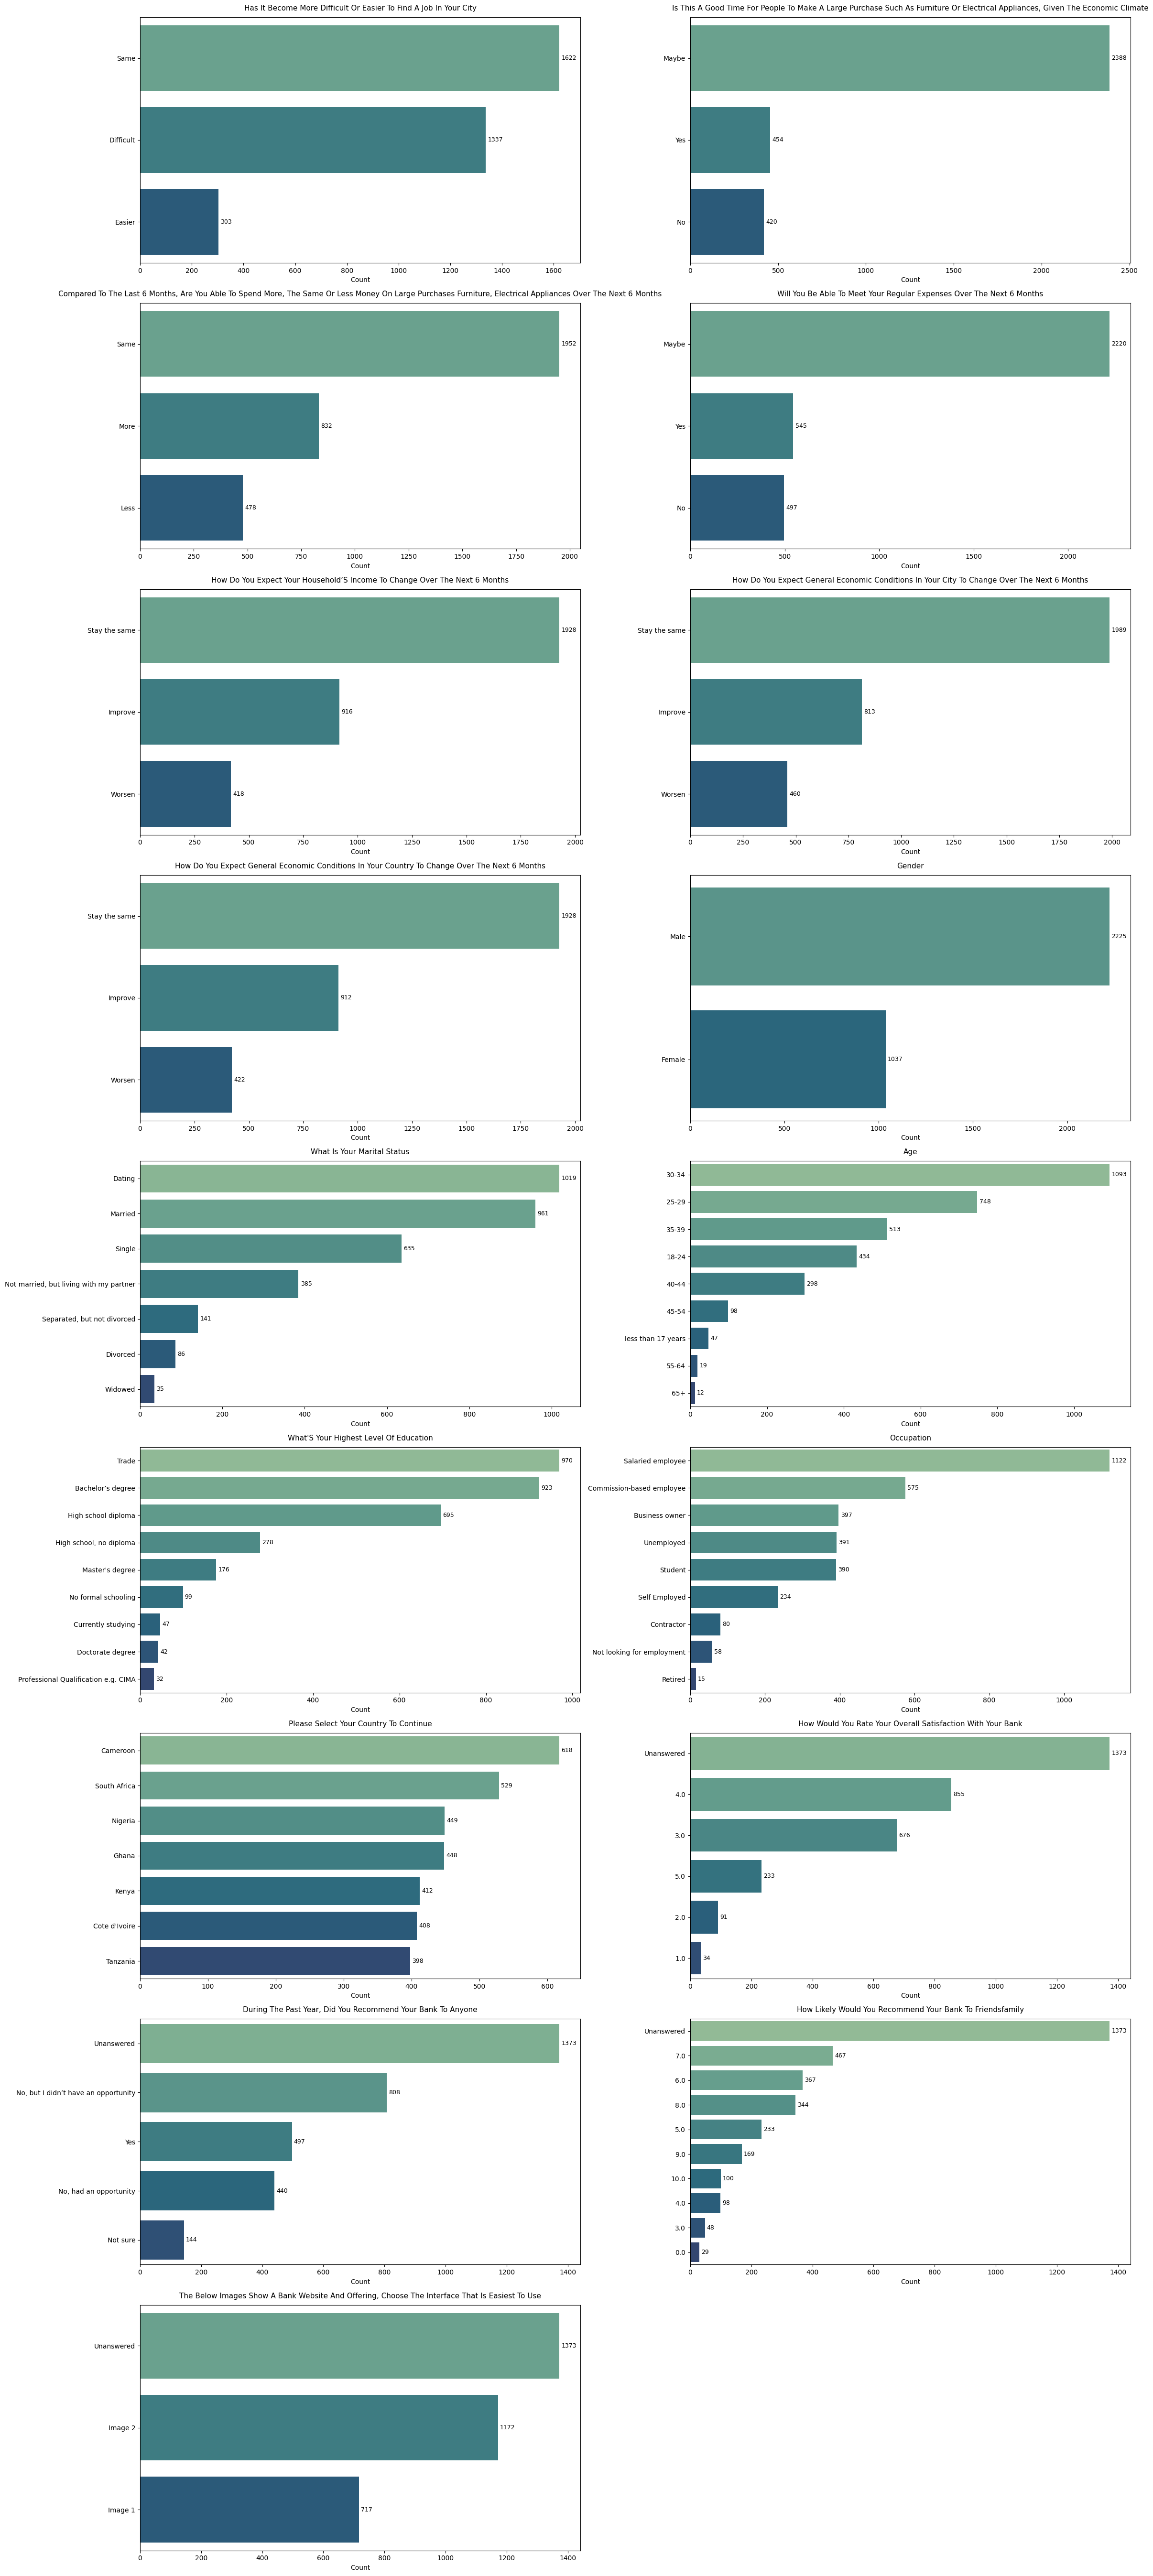

In [136]:
plot_value_counts(surv)


In [172]:
def plot_wordclouds(df, text_cols=None, max_words=150, min_word_length=3):


    if text_cols is None:
        text_cols = [c for c in df.columns if df[c].nunique() > 50]

    if not text_cols:
        return

    for col in text_cols:

        text = " ".join(df[col].dropna().astype(str))


        text = " ".join([w for w in text.split() if len(w) >= min_word_length])

        if not text.strip():
            continue

        wc = WordCloud(width=800, height=400, background_color='white',
                       max_words=max_words, colormap='crest').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(col.replace('_', ' ').title(), fontsize=13, pad=10)
        plt.show()

    return



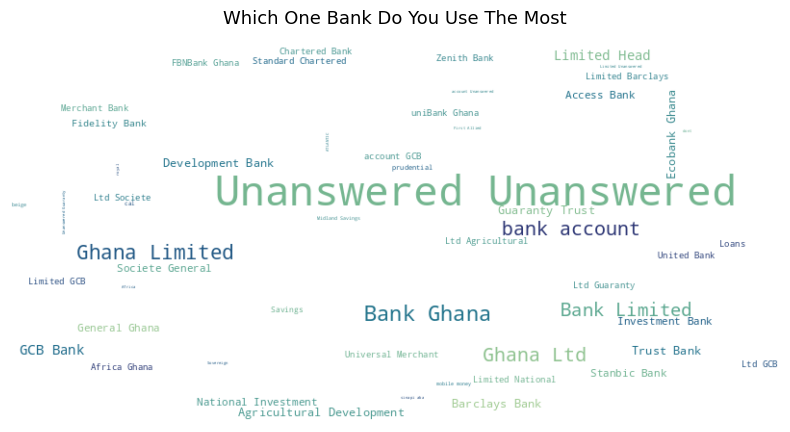

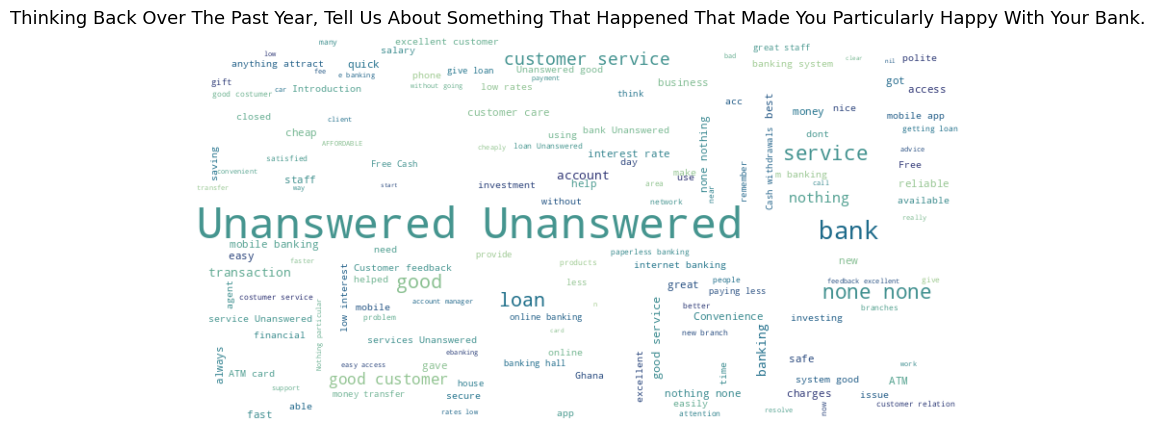

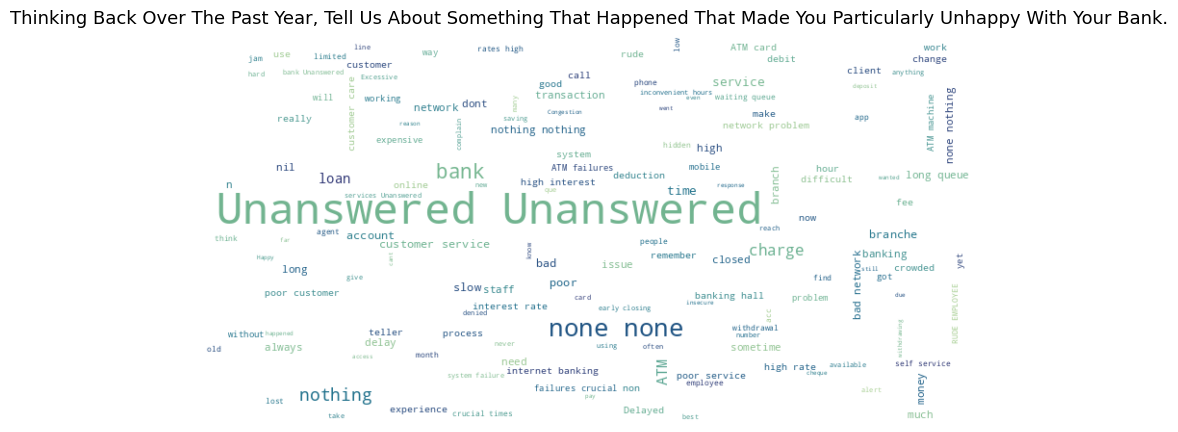

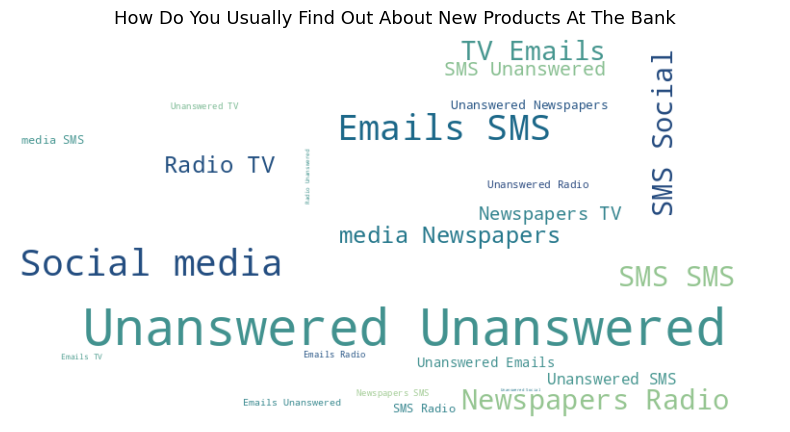

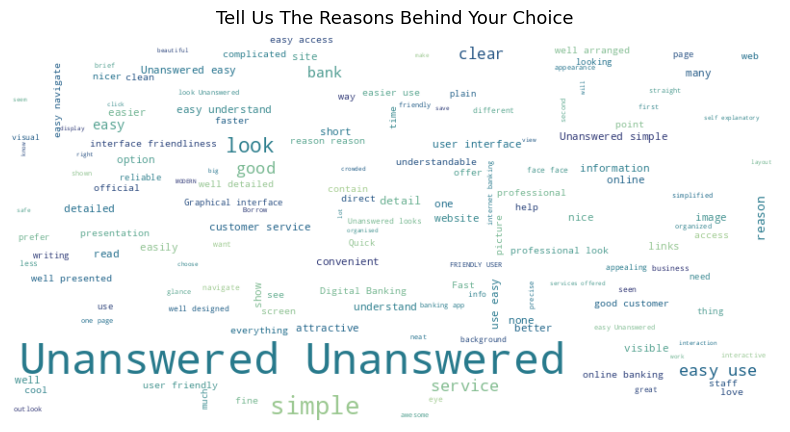

In [173]:
text_cols = [c for c in surv.columns if surv[c].nunique() > 50]
plot_wordclouds(surv, text_cols)


In [159]:
from collections import Counter
import pandas as pd
import re

def get_word_frequencies(df, text_cols=None, min_word_length=3, top_n=20):

    if text_cols is None:
        text_cols = [c for c in df.columns if df[c].nunique() > 50]

    word_freqs = {}

    for col in text_cols:

        text = " ".join(df[col].dropna().astype(str)).lower()
        text = re.sub(r'[^a-z\s]', ' ', text)
        words = [w for w in text.split() if len(w) >= min_word_length]


        counter = Counter(words)
        top_words = counter.most_common(top_n)

        word_freqs[col] = pd.DataFrame(top_words, columns=['word', 'count'])
        print(f" {col}: {len(counter)} unique words, showing top {top_n}")

    return word_freqs


In [160]:
text_cols = [c for c in surv.columns if surv[c].nunique() > 50]
freqs = get_word_frequencies(surv, text_cols)


 which_one_bank_do_you_use_the_most: 67 unique words, showing top 20
 thinking_back_over_the_past_year,_tell_us_about_something_that_happened_that_made_you_particularly_happy_with_your_bank.: 1064 unique words, showing top 20
 thinking_back_over_the_past_year,_tell_us_about_something_that_happened_that_made_you_particularly_unhappy_with_your_bank.: 1114 unique words, showing top 20
 how_do_you_usually_find_out_about_new_products_at_the_bank: 7 unique words, showing top 20
 tell_us_the_reasons_behind_your_choice: 807 unique words, showing top 20


In [161]:
def plot_word_frequencies(freq_df, title=None, top_n=15):
    plt.figure(figsize=(10,5))
    sns.barplot(data=freq_df.head(top_n), x='count', y='word', palette='crest')
    plt.title(title or 'Top Word Frequencies')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()


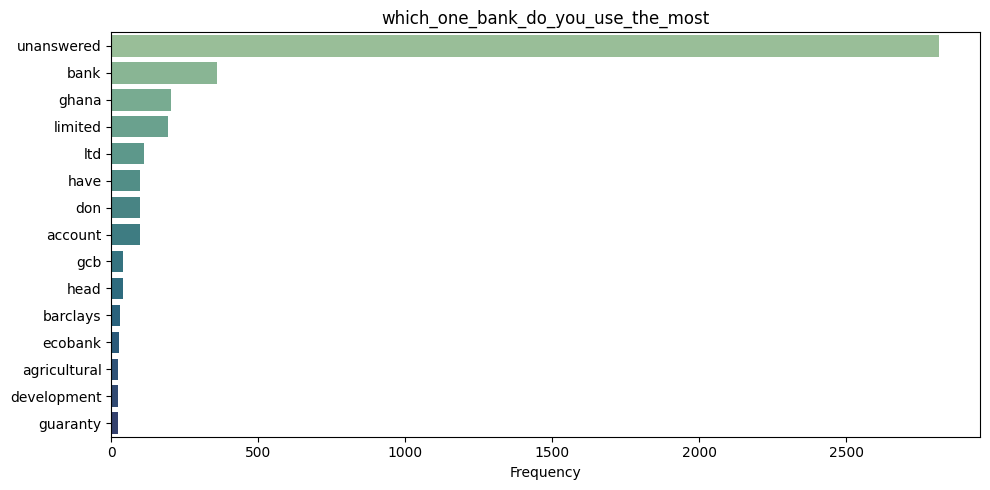

In [162]:
plot_word_frequencies(freqs[text_cols[0]], title=text_cols[0])


In [166]:
def analyze_categoricals_by_country(surv, country_col='please_select_your_country_to_continue',
                                    max_unique=30, figsize=(14,6), perform_tests=True):


    cat_cols = [
        c for c in surv.columns
        if surv[c].dtype == 'object'
        and surv[c].nunique() <= max_unique
        and c != country_col
    ]

    results = []

    n_cols = 2
    n_rows = math.ceil(len(cat_cols) / n_cols)

    plt.figure(figsize=(figsize[0]*n_cols, figsize[1]*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)

        sns.countplot(
            data=surv,
            y=col,
            hue=country_col,
            order=surv[col].value_counts().index,
            palette='crest'
        )

        plt.title(col.replace('_', ' ').title(), fontsize=10, pad=8)
        plt.xlabel('Count')
        plt.ylabel('')
        plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

        if perform_tests:
            try:
                contingency = pd.crosstab(surv[col], surv[country_col])
                chi2, p, dof, ex = chi2_contingency(contingency)
                results.append({
                    'question': col,
                    'chi2': chi2,
                    'p_value': p,
                    'significant': p < 0.05
                })
            except Exception as e:
                results.append({'question': col, 'error': str(e)})

        plt.tight_layout()

    plt.show()

    if perform_tests:
        results_df = pd.DataFrame(results).sort_values('p_value')
        print("Chi-Square Test Results by Country:")
        display(results_df)
        return results_df


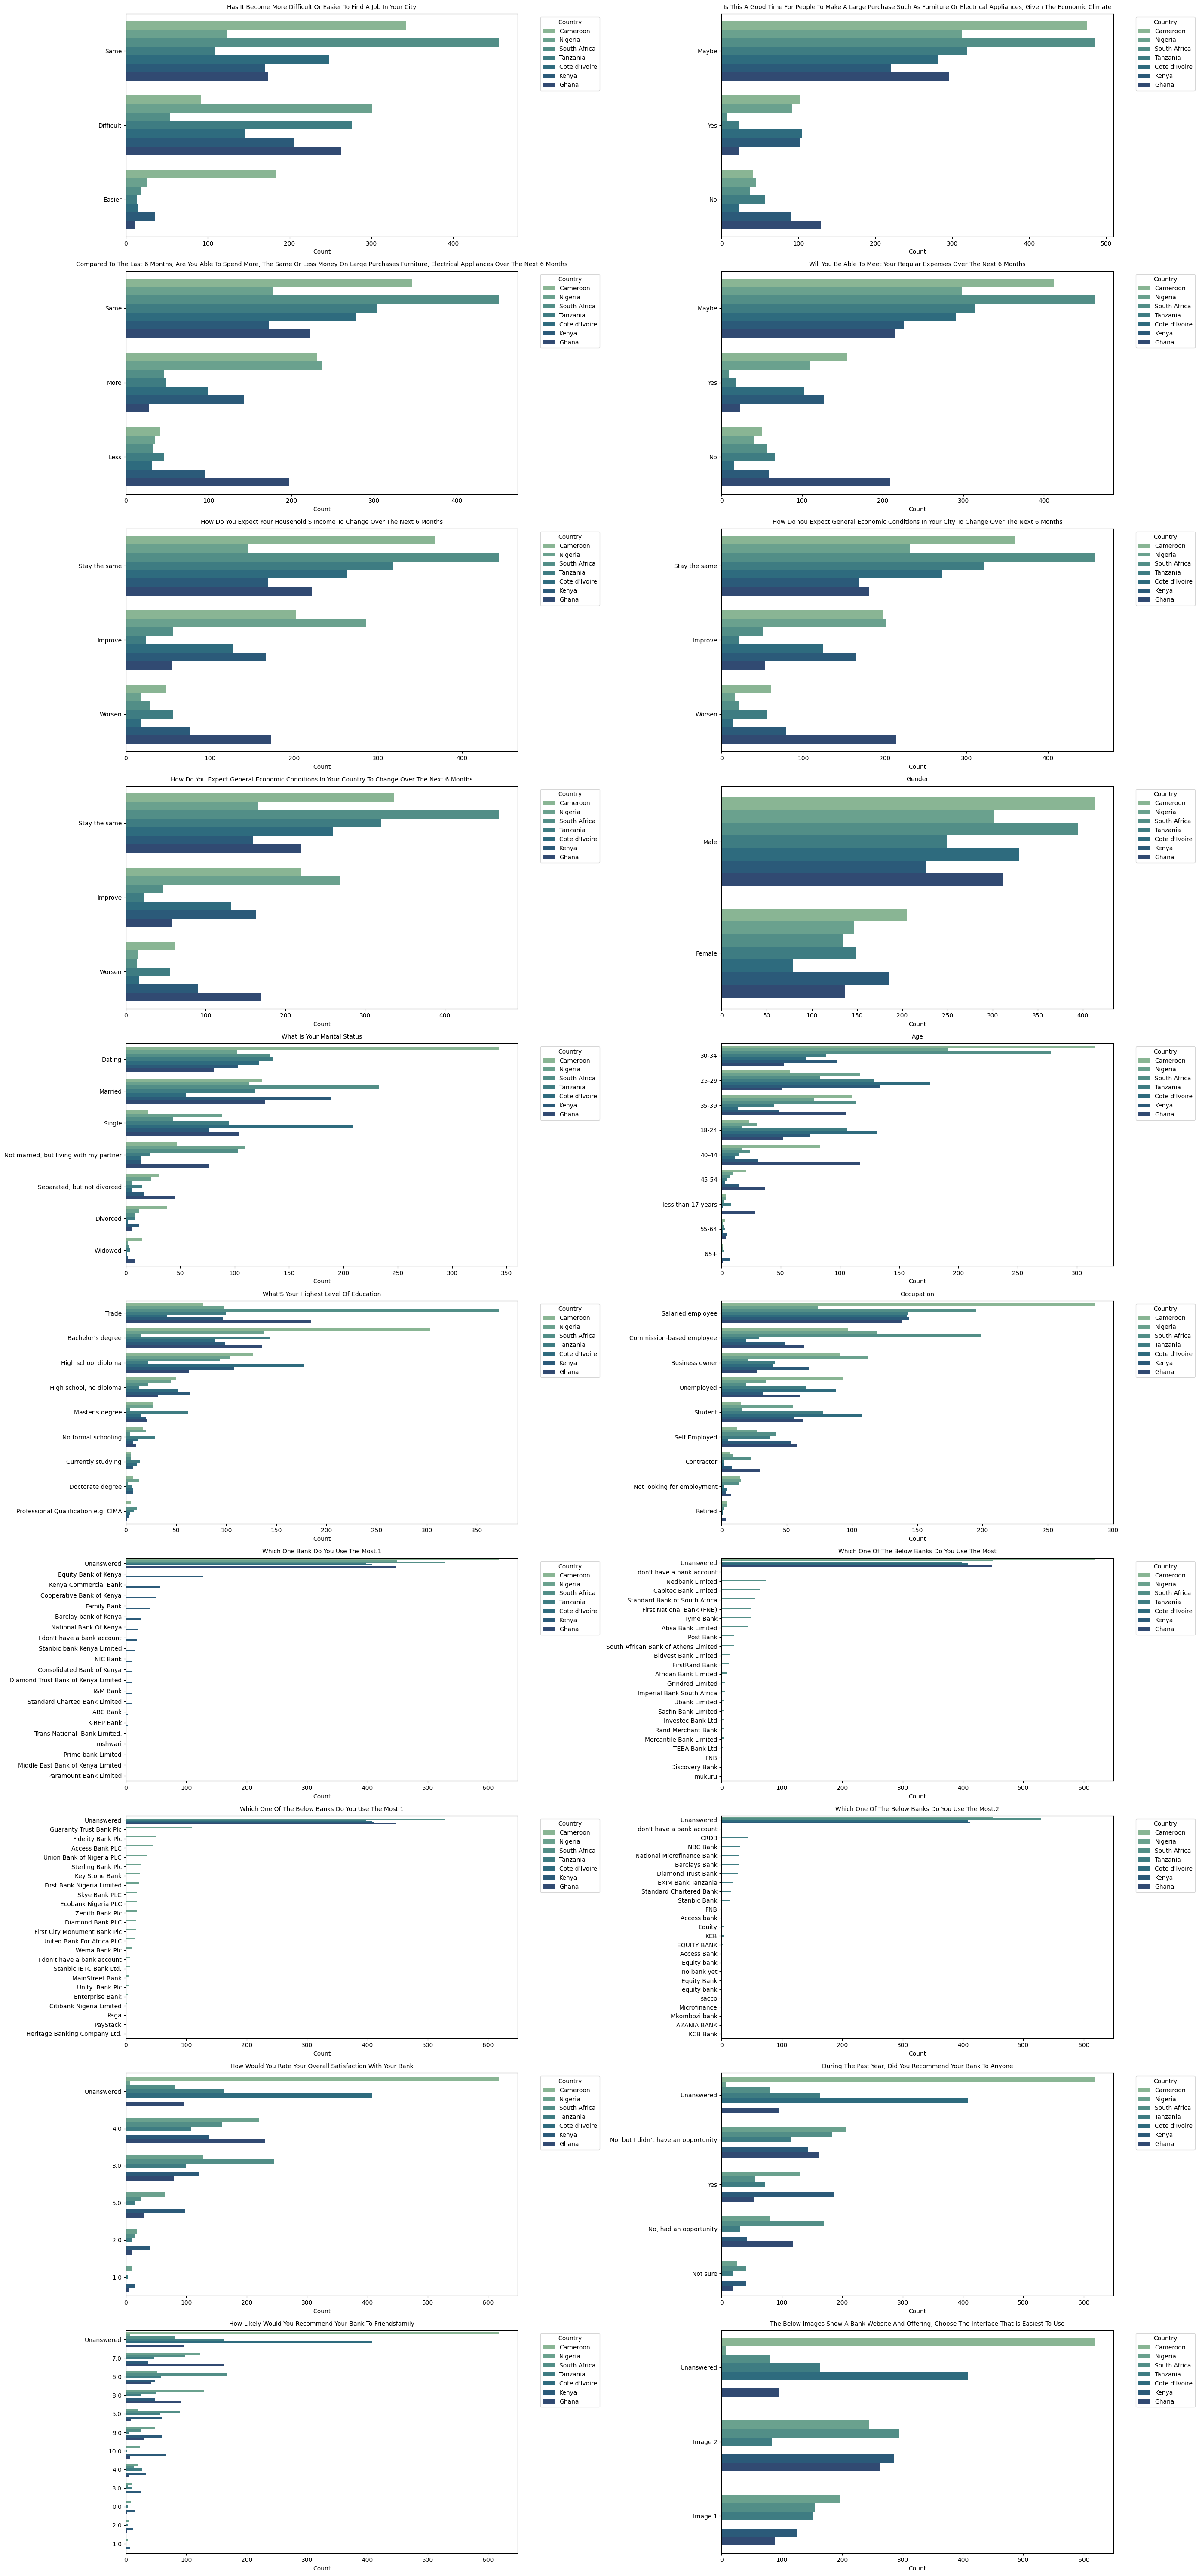

Chi-Square Test Results by Country:


,question,chi2,p_value,significant
12,which_one_bank_do_you_use_the_most.1,3262.000000,0.000000e+00,True
13,which_one_of_the_below_banks_do_you_use_the_most,3262.000000,0.000000e+00,True
14,which_one_of_the_below_banks_do_you_use_the_mo...,3262.000000,0.000000e+00,True
15,which_one_of_the_below_banks_do_you_use_the_mo...,3262.000000,0.000000e+00,True
19,the_below_images_show_a_bank_website_and_offer...,2384.875892,0.000000e+00,True
18,how_likely_would_you_recommend_your_bank_to_fr...,3287.368722,0.000000e+00,True
17,"during_the_past_year,_did_you_recommend_your_b...",2604.952226,0.000000e+00,True
16,how_would_you_rate_your_overall_satisfaction_w...,2621.167643,0.000000e+00,True
9,age,1180.643879,9.251631e-216,True
0,has_it_become_more_difficult_or_easier_to_find...,1036.327099,2.895913e-214,True


In [167]:
results = analyze_categoricals_by_country(surv)


In [168]:
def analyze_categoricals_by_group(
    surv,
    group_col='gender',
    max_unique=30,
    figsize=(14,6),
    perform_tests=True
):



    cat_cols = [
        c for c in surv.columns
        if surv[c].dtype == 'object'
        and surv[c].nunique() <= max_unique
        and c != group_col
    ]

    results = []

    n_cols = 2
    n_rows = math.ceil(len(cat_cols) / n_cols)

    plt.figure(figsize=(figsize[0]*n_cols, figsize[1]*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)


        sns.countplot(
            data=surv,
            y=col,
            hue=group_col,
            order=surv[col].value_counts().index,
            palette='crest'
        )

        plt.title(col.replace('_', ' ').title(), fontsize=10, pad=8)
        plt.xlabel('Count')
        plt.ylabel('')
        plt.legend(title=group_col.title(), bbox_to_anchor=(1.05, 1), loc='upper left')


        if perform_tests:
            try:
                contingency = pd.crosstab(surv[col], surv[group_col])
                chi2, p, dof, ex = chi2_contingency(contingency)
                results.append({
                    'question': col,
                    'chi2': chi2,
                    'p_value': p,
                    'significant': p < 0.05
                })
            except Exception as e:
                results.append({'question': col, 'error': str(e)})

        plt.tight_layout()

    plt.show()

    if perform_tests:
        results_df = pd.DataFrame(results).sort_values('p_value')
        print(f" Chi-Square Test Results by {group_col.title()}:")
        display(results_df)
        return results_df


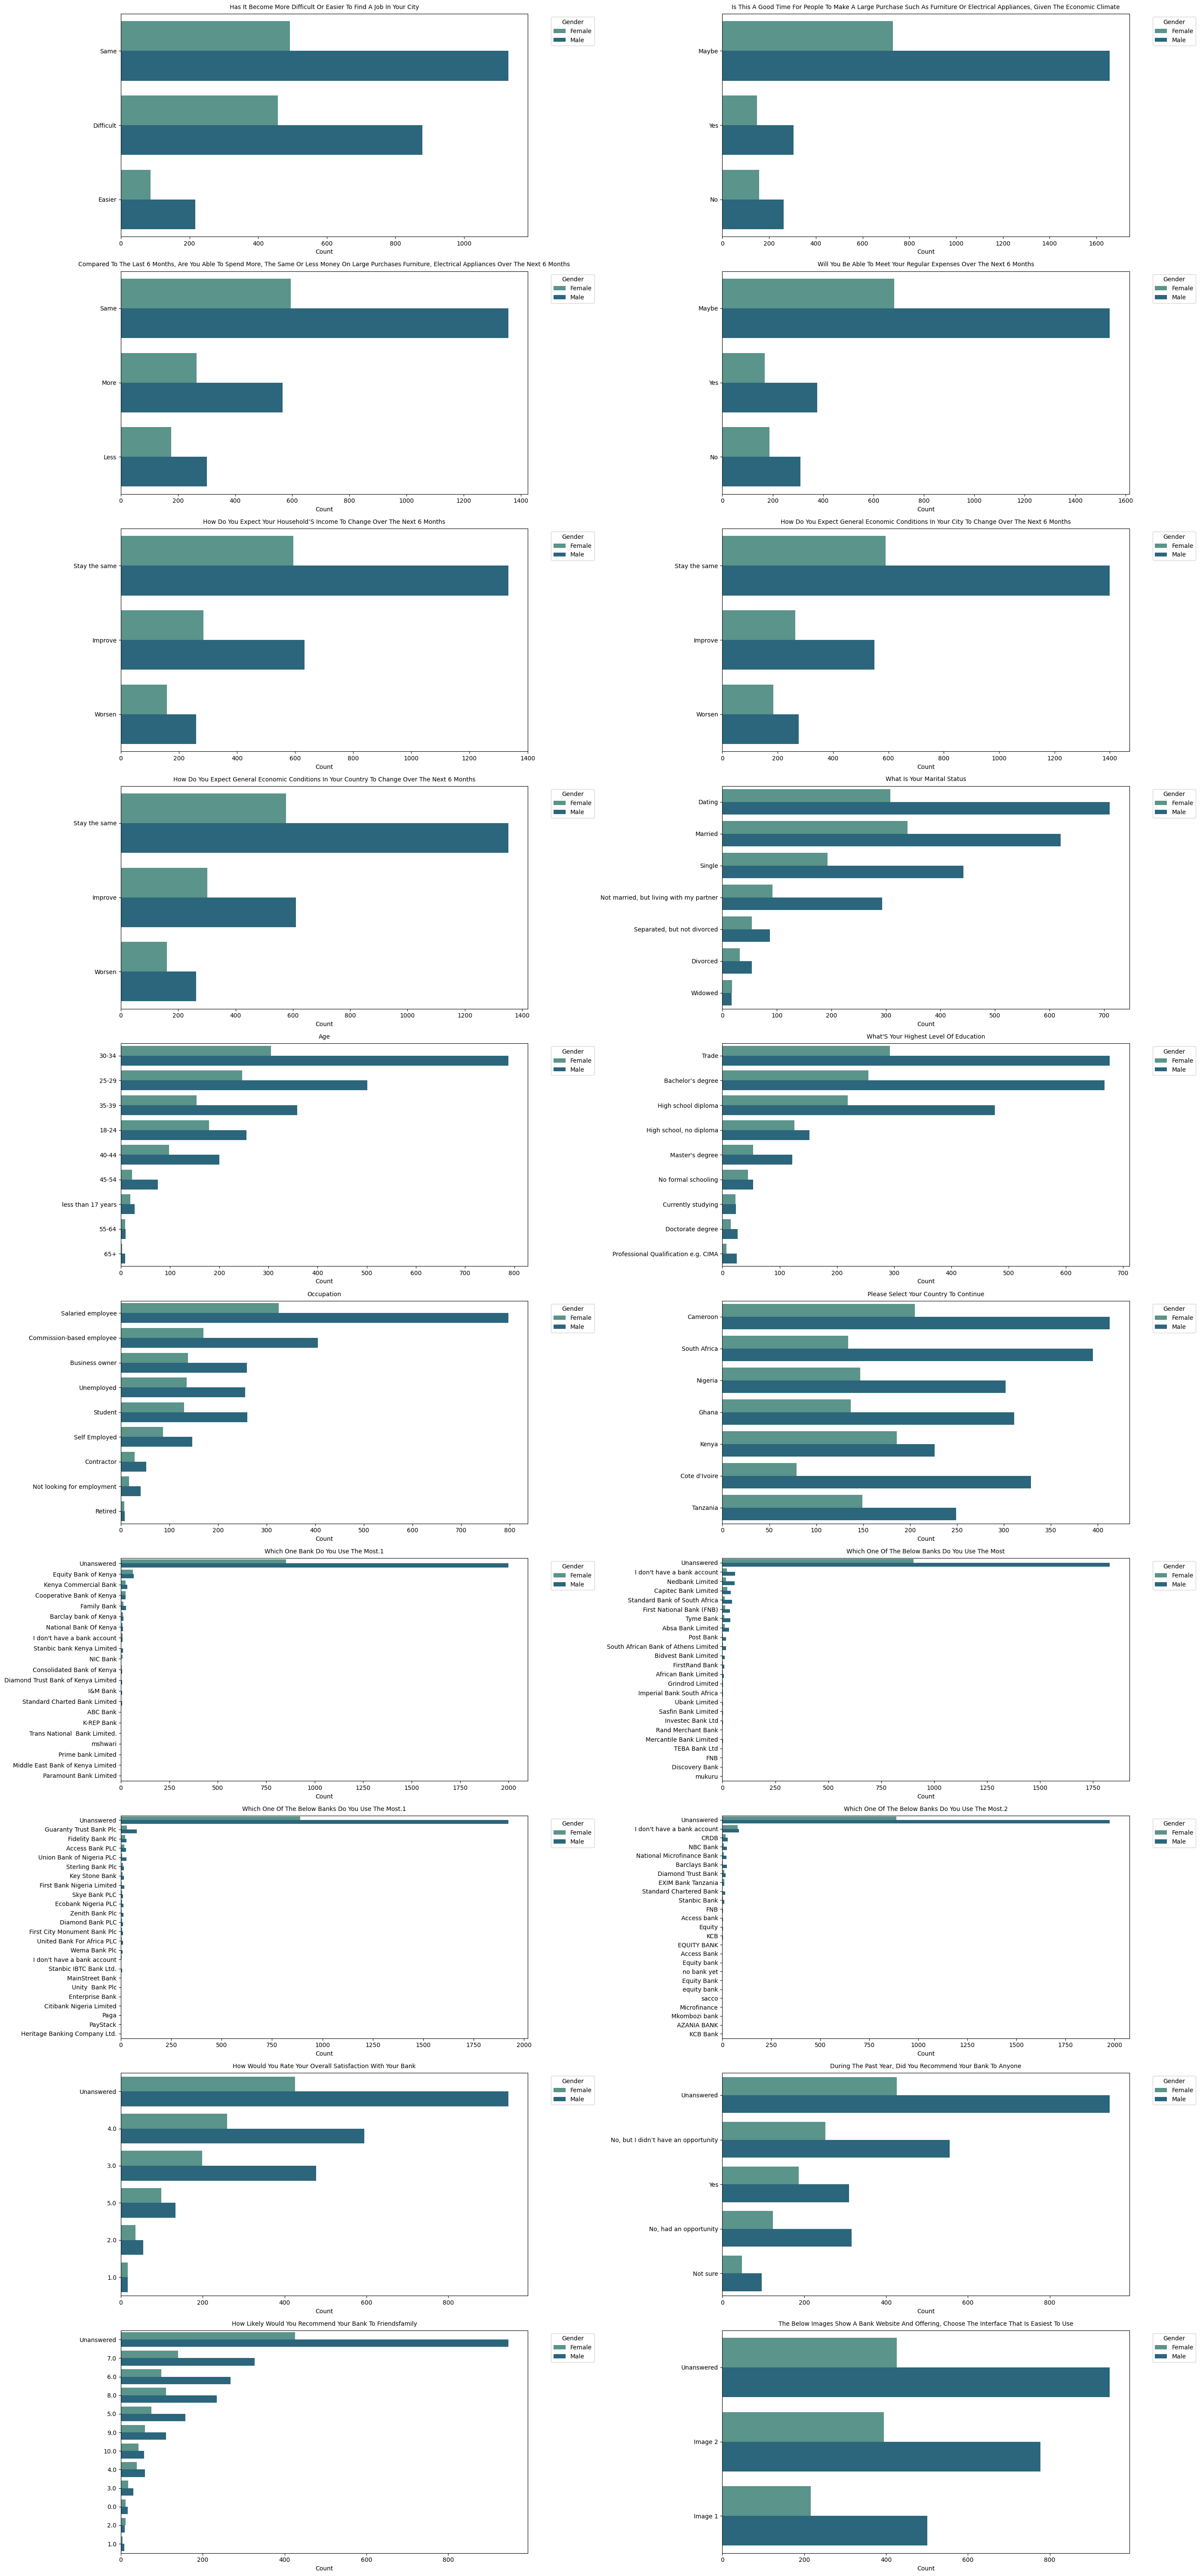

 Chi-Square Test Results by Gender:


,question,chi2,p_value,significant
11,please_select_your_country_to_continue,80.013807,3.549480e-15,True
9,what's_your_highest_level_of_education,48.750933,7.096297e-08,True
12,which_one_bank_do_you_use_the_most.1,62.481594,2.921342e-06,True
8,age,34.054699,3.970983e-05,True
7,what_is_your_marital_status,28.639641,7.117128e-05,True
5,how_do_you_expect_general_economic_conditions_...,18.821204,8.185166e-05,True
16,how_would_you_rate_your_overall_satisfaction_w...,22.878919,3.560395e-04,True
15,which_one_of_the_below_banks_do_you_use_the_mo...,50.774566,1.127286e-03,True
6,how_do_you_expect_general_economic_conditions_...,11.179421,3.736109e-03,True
3,will_you_be_able_to_meet_your_regular_expenses...,9.209938,1.000201e-02,True


In [169]:

results_gender = analyze_categoricals_by_group(surv, group_col='gender')


In [170]:
for col in surv.select_dtypes('object'):
    print(f"\n--- {col} ---")
    vc = surv[col].value_counts(dropna=False)
    pct = surv[col].value_counts(normalize=True, dropna=False).mul(100).round(2)
    desc = pd.DataFrame({'count': vc, 'percent': pct})
    display(desc)



--- has_it_become_more_difficult_or_easier_to_find_a_job_in_your_city ---


,count,percent
has_it_become_more_difficult_or_easier_to_find_a_job_in_your_city,,
Same,1622,49.72
Difficult,1337,40.99
Easier,303,9.29



--- is_this_a_good_time_for_people_to_make_a_large_purchase_such_as_furniture_or_electrical_appliances,_given_the_economic_climate ---


,count,percent
"is_this_a_good_time_for_people_to_make_a_large_purchase_such_as_furniture_or_electrical_appliances,_given_the_economic_climate",,
Maybe,2388,73.21
Yes,454,13.92
No,420,12.88



--- compared_to_the_last_6_months,_are_you_able_to_spend_more,_the_same_or_less_money_on_large_purchases_furniture,_electrical_appliances_over_the_next_6_months ---


,count,percent
"compared_to_the_last_6_months,_are_you_able_to_spend_more,_the_same_or_less_money_on_large_purchases_furniture,_electrical_appliances_over_the_next_6_months",,
Same,1952,59.84
More,832,25.51
Less,478,14.65



--- will_you_be_able_to_meet_your_regular_expenses_over_the_next_6_months ---


,count,percent
will_you_be_able_to_meet_your_regular_expenses_over_the_next_6_months,,
Maybe,2220,68.06
Yes,545,16.71
No,497,15.24



--- how_do_you_expect_your_household’s_income_to_change_over_the_next_6_months ---


,count,percent
how_do_you_expect_your_household’s_income_to_change_over_the_next_6_months,,
Stay the same,1928,59.10
Improve,916,28.08
Worsen,418,12.81



--- how_do_you_expect_general_economic_conditions_in_your_city_to_change_over_the_next_6_months ---


,count,percent
how_do_you_expect_general_economic_conditions_in_your_city_to_change_over_the_next_6_months,,
Stay the same,1989,60.97
Improve,813,24.92
Worsen,460,14.10



--- how_do_you_expect_general_economic_conditions_in_your_country_to_change_over_the_next_6_months ---


,count,percent
how_do_you_expect_general_economic_conditions_in_your_country_to_change_over_the_next_6_months,,
Stay the same,1928,59.10
Improve,912,27.96
Worsen,422,12.94



--- gender ---


,count,percent
gender,,
Male,2225,68.21
Female,1037,31.79



--- what_is_your_marital_status ---


,count,percent
what_is_your_marital_status,,
Dating,1019,31.24
Married,961,29.46
Single,635,19.47
"Not married, but living with my partner",385,11.80
"Separated, but not divorced",141,4.32
Divorced,86,2.64
Widowed,35,1.07



--- age ---


,count,percent
age,,
30-34,1093,33.51
25-29,748,22.93
35-39,513,15.73
18-24,434,13.30
40-44,298,9.14
45-54,98,3.00
less than 17 years,47,1.44
55-64,19,0.58
65+,12,0.37



--- what's_your_highest_level_of_education ---


,count,percent
what's_your_highest_level_of_education,,
Trade,970,29.74
Bachelor’s degree,923,28.30
High school diploma,695,21.31
"High school, no diploma",278,8.52
Master's degree,176,5.40
No formal schooling,99,3.03
Currently studying,47,1.44
Doctorate degree,42,1.29
Professional Qualification e.g. CIMA,32,0.98



--- occupation ---


,count,percent
occupation,,
Salaried employee,1122,34.40
Commission-based employee,575,17.63
Business owner,397,12.17
Unemployed,391,11.99
Student,390,11.96
Self Employed,234,7.17
Contractor,80,2.45
Not looking for employment,58,1.78
Retired,15,0.46



--- please_select_your_country_to_continue ---


,count,percent
please_select_your_country_to_continue,,
Cameroon,618,18.95
South Africa,529,16.22
Nigeria,449,13.76
Ghana,448,13.73
Kenya,412,12.63
Cote d'Ivoire,408,12.51
Tanzania,398,12.20



--- which_one_bank_do_you_use_the_most ---


,count,percent
which_one_bank_do_you_use_the_most,,
Unanswered,2814,86.27
I don't have a bank account,96,2.94
GCB Bank Limited Head,39,1.20
Barclays Bank of Ghana Ltd.,28,0.86
Ecobank Ghana Limited,26,0.80
Agricultural Development Bank Limited,24,0.74
Guaranty Trust Bank (Ghana) Limited,23,0.71
National Investment Bank Ltd,19,0.58
Stanbic Bank Ghana Ltd,19,0.58



--- which_one_bank_do_you_use_the_most.1 ---


,count,percent
which_one_bank_do_you_use_the_most.1,,
Unanswered,2850,87.37
Equity Bank of Kenya,128,3.92
Kenya Commercial Bank,57,1.75
Cooperative Bank of Kenya,50,1.53
Family Bank,40,1.23
Barclay bank of Kenya,24,0.74
National Bank Of Kenya,21,0.64
I don't have a bank account,18,0.55
Stanbic bank Kenya Limited,14,0.43



--- which_one_of_the_below_banks_do_you_use_the_most ---


,count,percent
which_one_of_the_below_banks_do_you_use_the_most,,
Unanswered,2733,83.78
I don't have a bank account,81,2.48
Nedbank Limited,74,2.27
Capitec Bank Limited,63,1.93
Standard Bank of South Africa,56,1.72
First National Bank (FNB),49,1.50
Tyme Bank,48,1.47
Absa Bank Limited,43,1.32
Post Bank,21,0.64



--- which_one_of_the_below_banks_do_you_use_the_most.1 ---


,count,percent
which_one_of_the_below_banks_do_you_use_the_most.1,,
Unanswered,2813,86.24
Guaranty Trust Bank Plc,110,3.37
Fidelity Bank Plc,49,1.50
Access Bank PLC,44,1.35
Union Bank of Nigeria PLC,35,1.07
Sterling Bank Plc,25,0.77
Key Stone Bank,23,0.71
First Bank Nigeria Limited,22,0.67
Skye Bank PLC,18,0.55



--- which_one_of_the_below_banks_do_you_use_the_most.2 ---


,count,percent
which_one_of_the_below_banks_do_you_use_the_most.2,,
Unanswered,2864,87.80
I don't have a bank account,163,5.00
CRDB,44,1.35
NBC Bank,31,0.95
National Microfinance Bank,29,0.89
Barclays Bank,28,0.86
Diamond Trust Bank,27,0.83
EXIM Bank Tanzania,20,0.61
Standard Chartered Bank,16,0.49



--- how_would_you_rate_your_overall_satisfaction_with_your_bank ---


,count,percent
how_would_you_rate_your_overall_satisfaction_with_your_bank,,
Unanswered,1373,42.09
4.0,855,26.21
3.0,676,20.72
5.0,233,7.14
2.0,91,2.79
1.0,34,1.04



--- thinking_back_over_the_past_year,_tell_us_about_something_that_happened_that_made_you_particularly_happy_with_your_bank. ---


,count,percent
"thinking_back_over_the_past_year,_tell_us_about_something_that_happened_that_made_you_particularly_happy_with_your_bank.",,
Unanswered,1431,43.87
none,223,6.84
nothing,53,1.62
good customer service,15,0.46
Nothing,11,0.34
...,...,...
introduction of mobile banking,1,0.03
I can cash or withdraw funds using my phone,1,0.03
The bank improved on commercials,1,0.03



--- thinking_back_over_the_past_year,_tell_us_about_something_that_happened_that_made_you_particularly_unhappy_with_your_bank. ---


,count,percent
"thinking_back_over_the_past_year,_tell_us_about_something_that_happened_that_made_you_particularly_unhappy_with_your_bank.",,
Unanswered,1485,45.52
none,318,9.75
nothing,79,2.42
nil,24,0.74
None,23,0.71
...,...,...
I got deducted several times as a result of your system failure which is no fault of mine and I did the honorable thing of making a complaint but up till now,1,0.03
i initially saved 100gh there and the money has reduced ti 24gh due to atm charges and i dpnt use the atm card too,1,0.03
need an upgrade on therir internet apps,1,0.03



--- during_the_past_year,_did_you_recommend_your_bank_to_anyone ---


,count,percent
"during_the_past_year,_did_you_recommend_your_bank_to_anyone",,
Unanswered,1373,42.09
"No, but I didn’t have an opportunity",808,24.77
Yes,497,15.24
"No, had an opportunity",440,13.49
Not sure,144,4.41



--- how_do_you_usually_find_out_about_new_products_at_the_bank ---


,count,percent
how_do_you_usually_find_out_about_new_products_at_the_bank,,
Unanswered,1373,42.09
SMS,425,13.03
Emails,181,5.55
"Emails, SMS",157,4.81
TV,85,2.61
...,...,...
"Newspapers, Radio, SMS, Social media",5,0.15
"Newspapers, Radio, Emails, SMS, Social media",4,0.12
"Radio, SMS, Social media",4,0.12



--- how_likely_would_you_recommend_your_bank_to_friendsfamily ---


,count,percent
how_likely_would_you_recommend_your_bank_to_friendsfamily,,
Unanswered,1373,42.09
7.0,467,14.32
6.0,367,11.25
8.0,344,10.55
5.0,233,7.14
9.0,169,5.18
10.0,100,3.07
4.0,98,3.00
3.0,48,1.47



--- the_below_images_show_a_bank_website_and_offering,_choose_the_interface_that_is_easiest_to_use ---


,count,percent
"the_below_images_show_a_bank_website_and_offering,_choose_the_interface_that_is_easiest_to_use",,
Unanswered,1373,42.09
Image 2,1172,35.93
Image 1,717,21.98



--- tell_us_the_reasons_behind_your_choice ---


,count,percent
tell_us_the_reasons_behind_your_choice,,
Unanswered,1397,42.83
simple,69,2.12
no reason,65,1.99
none,28,0.86
easy to use,25,0.77
...,...,...
Has Illustrations,1,0.03
Has symbols,1,0.03
It's short,1,0.03



--- what_will_make_you_stay_with_your_bank_for_the_next_2_years ---


,count,percent
what_will_make_you_stay_with_your_bank_for_the_next_2_years,,
Unanswered,1373,42.09
The convenience (i.e. I get services easily and cheaply),827,25.35
My bank is genuinely interested in my financial wellbeing,594,18.21
An excellent customer service,438,13.43
all above,1,0.03
all the above,1,0.03
no clue,1,0.03
i dont basnk because if scarcity of money ok,1,0.03
I dont have a bank,1,0.03


# Pipeline Code

In [175]:
def proportion_ci(count, n, alpha=0.05):
    if n == 0: return (0, 0)
    p = count / n
    z = 1.96
    se = np.sqrt(p*(1-p)/n)
    lower = max(0, p - z*se)
    upper = min(1, p + z*se)
    return round(lower*100,2), round(upper*100,2)

def cramers_v(table):
    chi2, p, dof, ex = chi2_contingency(table)
    n = table.sum().sum()
    min_dim = min(table.shape)-1
    if min_dim == 0: return 0
    return np.sqrt(chi2 / (n * min_dim))

def prepare_long_format(df, id_cols=['gender','please_select_your_country_to_continue']):
    value_cols = [c for c in df.columns if c not in id_cols]
    return df.melt(id_vars=id_cols, value_vars=value_cols, var_name='question', value_name='response')

def compute_summary(long_df, group_col):
    """Frequencies, percentages, CI"""
    rows = []
    for q in long_df['question'].unique():
        df_q = long_df[long_df['question']==q]
        for grp in df_q[group_col].dropna().unique():
            grp_df = df_q[df_q[group_col]==grp]
            n = len(grp_df)
            counts = grp_df['response'].value_counts()
            for resp, cnt in counts.items():
                lower, upper = proportion_ci(cnt, n)
                rows.append({
                    'question': q,
                    group_col: grp,
                    'response': resp,
                    'count': cnt,
                    'percent': round(cnt/n*100,2),
                    'ci_lower': lower,
                    'ci_upper': upper
                })
    return pd.DataFrame(rows)

def chi_square_tests(long_df, group_col):
    results = []
    for q in long_df['question'].unique():
        df_q = long_df[long_df['question']==q]
        table = pd.crosstab(df_q['response'], df_q[group_col])
        if table.shape[0]>1 and table.shape[1]>1:
            chi2, p, dof, ex = chi2_contingency(table)
            v = cramers_v(table)
            results.append({'question': q, 'chi2': chi2, 'p_value': p, 'significant': p<0.05, 'cramers_v': round(v,3)})
    return pd.DataFrame(results)

def plot_top_responses(summary_df, question, group_col, top_n=5):
    df_q = summary_df[summary_df['question']==question]
    df_top = df_q.sort_values('count', ascending=False).groupby(group_col).head(top_n)
    plt.figure(figsize=(8,5))
    sns.barplot(x='count', y='response', hue=group_col, data=df_top, palette='crest')
    plt.title(f'Top responses for "{question}" by {group_col}')
    plt.tight_layout()
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return buf

# -------------------------
# Main Pipeline
# -------------------------

output_file = '/content/drive/MyDrive/Survey_Dashboard_Insights.xlsx'

# Prepare long format
long_df = prepare_long_format(surv)

# Summary tables
summary_country = compute_summary(long_df, 'please_select_your_country_to_continue')
summary_gender = compute_summary(long_df, 'gender')

# Chi-square + Cramer’s V
chi_country = chi_square_tests(long_df, 'please_select_your_country_to_continue')
chi_gender = chi_square_tests(long_df, 'gender')

# Write to Excel with charts
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    workbook = writer.book

    # Raw long-format data
    long_df.to_excel(writer, sheet_name='Raw_Long_Data', index=False)

    # Summary tables
    summary_country.to_excel(writer, sheet_name='Summary_By_Country', index=False)
    summary_gender.to_excel(writer, sheet_name='Summary_By_Gender', index=False)

    # Chi-square tables
    chi_country.to_excel(writer, sheet_name='ChiSquare_Country', index=False)
    chi_gender.to_excel(writer, sheet_name='ChiSquare_Gender', index=False)

    # Charts: generate top responses charts and insert images
    chart_sheet = workbook.add_worksheet('Charts')
    row = 0
    for q in long_df['question'].unique():
        # Country chart
        buf_c = plot_top_responses(summary_country, q, 'please_select_your_country_to_continue')
        chart_sheet.insert_image(row, 0, f'{q}_country.png', {'image_data': buf_c, 'x_scale':0.7, 'y_scale':0.7})
        row += 20  # adjust spacing
        # Gender chart
        buf_g = plot_top_responses(summary_gender, q, 'gender')
        chart_sheet.insert_image(row, 0, f'{q}_gender.png', {'image_data': buf_g, 'x_scale':0.7, 'y_scale':0.7})
        row += 20

print(f" Dashboard-ready survey file with insights exported to '{output_file}'")

 Dashboard-ready survey file with insights exported to '/content/drive/MyDrive/Survey_Dashboard_Insights.xlsx'
